In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ABmarketing_campaign.csv")

In [4]:
df.head()

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0  1/1/2019             FB_Jan19               2116                  18   
1  1/2/2019             FB_Jan19               3106                  36   
2  1/3/2019             FB_Jan19               3105                  26   
3  1/4/2019             FB_Jan19               1107                  27   
4  1/5/2019             FB_Jan19               1317                  15   

   Facebook Ad Conversions Cost per Facebook Ad  \
0                        8                 $126   
1                       12                 $104   
2                        8                 $102   
3                        9                  $71   
4                        7                  $78   

  Facebook Click-Through Rate (Clicks / View)  \
0                                       0.83%   
1                                       1.15%   
2                                       0.84%   
3                                       2.45%   
4                                       1.10%   

  Facebook Conversion Rate (Conversions / Clicks)  \
0                                          42.73%   
1                                          34.04%   
2                                          31.45%   
3                                          34.76%   
4                                          47.59%   

  Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  \
0                                      $7.14            AW_Jan19   
1                                      $2.91            AW_Jan19   
2                                      $3.89            AW_Jan19   
3                                      $2.62            AW_Jan19   
4                                      $5.38            AW_Jan19   

   AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  \
0              4984                 59                       5   
1              4022                 71                       6   
2              3863                 44                       4   
3              3911                 49                       5   
4              4070                 55                       7   

  Cost per AdWords Ad AdWords Click-Through Rate (Clicks / View)  \
0                $194                                      1.18%   
1                 $75                                      1.77%   
2                $141                                      1.13%   
3                $141                                      1.26%   
4                $133                                      1.36%   

  AdWords Conversion Rate (Conversions / Click)  \
0                                         8.40%   
1                                         7.80%   
2                                         9.59%   
3                                        11.08%   
4                                        12.22%   

  AdWords Cost per Click (Ad Cost / Clicks)  
0                                     $3.30  
1                                     $1.05  
2                                     $3.23  
3                                     $2.86  
4                                     $2.40

In [6]:
df.shape

(365, 17)

In [7]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [8]:
df["Date"] = pd.to_datetime(df['Date'])

In [10]:
df.describe()

Date  Facebook Ad Views  Facebook Ad Clicks  \
count                  365         365.000000          365.000000   
mean   2019-07-02 00:00:00        2179.687671           44.049315   
min    2019-01-01 00:00:00        1050.000000           15.000000   
25%    2019-04-02 00:00:00        1656.000000           35.000000   
50%    2019-07-02 00:00:00        2202.000000           43.000000   
75%    2019-10-01 00:00:00        2717.000000           54.000000   
max    2019-12-31 00:00:00        3320.000000           73.000000   
std                    NaN         618.074639           12.140559   

       Facebook Ad Conversions  AdWords Ad Views  AdWords Ad Clicks  \
count               365.000000         365.00000         365.000000   
mean                 11.742466        4717.19726          60.383562   
min                   5.000000        3714.00000          31.000000   
25%                  10.000000        4247.00000          49.000000   
50%                  12.000000        4711.00000          60.000000   
75%                  13.000000        5190.00000          73.000000   
max                  19.000000        5760.00000          89.000000   
std                   2.924786         561.11406          14.368225   

       AdWords Ad Conversions  
count              365.000000  
mean                 5.980822  
min                  3.000000  
25%                  5.000000  
50%                  6.000000  
75%                  7.000000  
max                  9.000000  
std                  1.628106

## Comparing Campaign 

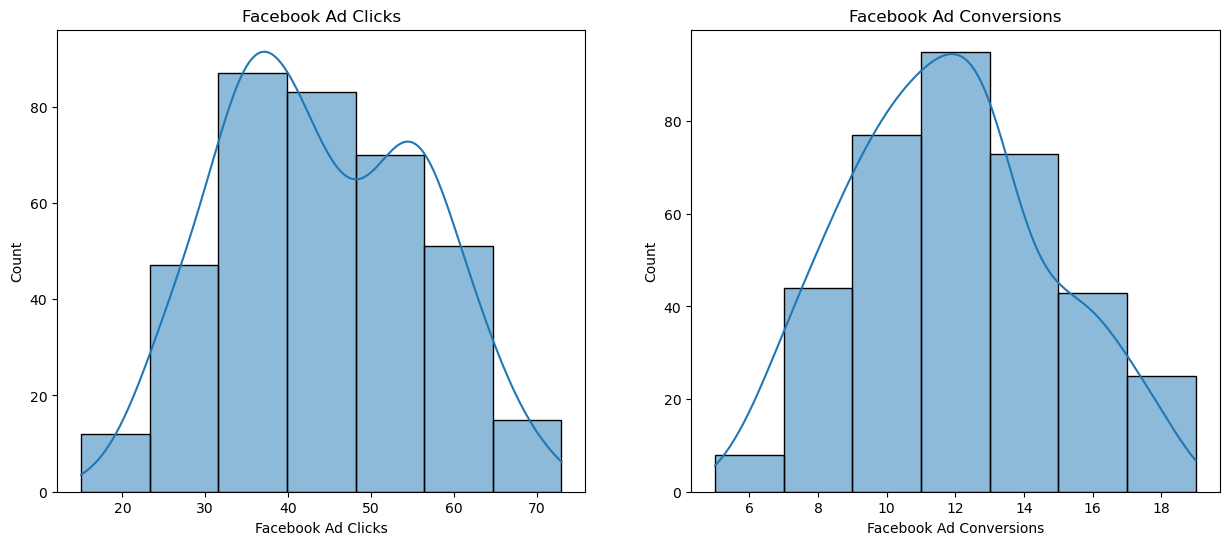

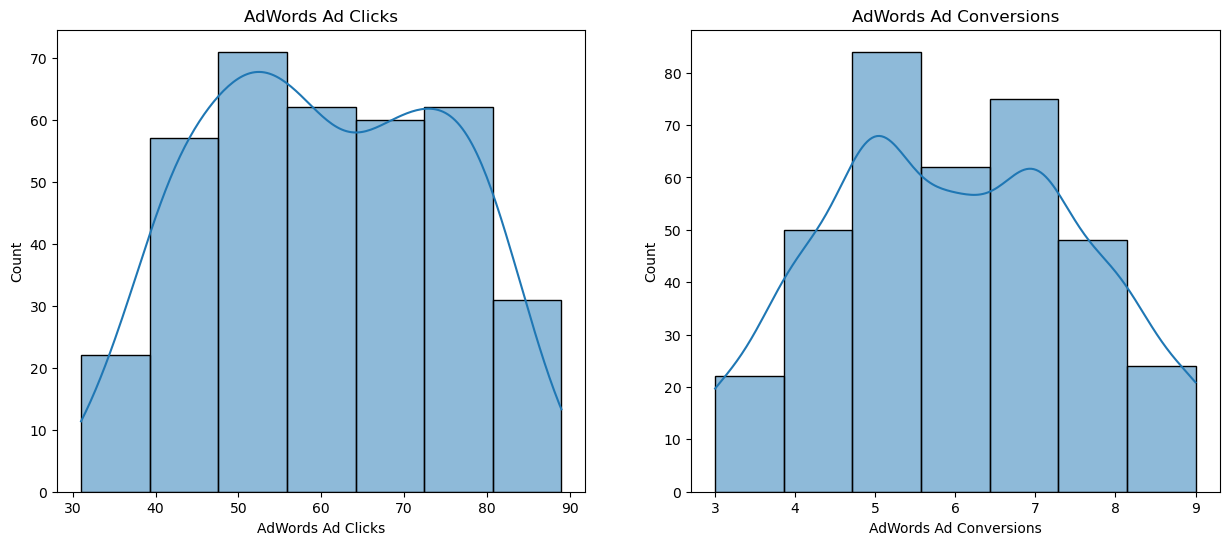

In [16]:
## distribution of the clicks and convertions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

### How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [9]:
## creating function to calculate the category for conversion
def create_conversion_category(conversion_col):
    category=[]
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion <11:
            category.append('6 - 10')
        elif 11 <= conversion <16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

## applying function of different campaign's conversion
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [11]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'AdWords Conversion Category']].head()

Facebook Ad Conversions Facebook Conversion Category  \
0                        8                       6 - 10   
1                       12                      10 - 15   
2                        8                       6 - 10   
3                        9                       6 - 10   
4                        7                       6 - 10   

   AdWords Ad Conversions AdWords Conversion Category  
0                       5                 less than 6  
1                       6                      6 - 10  
2                       4                 less than 6  
3                       5                 less than 6  
4                       7                      6 - 10

In [13]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [16]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

Category  count
0       10 - 15    189
1        6 - 10    128
2  more than 15     47
3   less than 6      1

In [17]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [18]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

Category  count
0       6 - 10    209
1  less than 6    156

In [19]:
category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

Category  count_x  count_y
0       10 - 15      189      0.0
1        6 - 10      128    209.0
2   less than 6        1    156.0
3  more than 15       47      0.0

In [20]:
category_df = category_df.iloc[[2, 1, 0, 3]]
category_df

Category  count_x  count_y
2   less than 6        1    156.0
1        6 - 10      128    209.0
0       10 - 15      189      0.0
3  more than 15       47      0.0

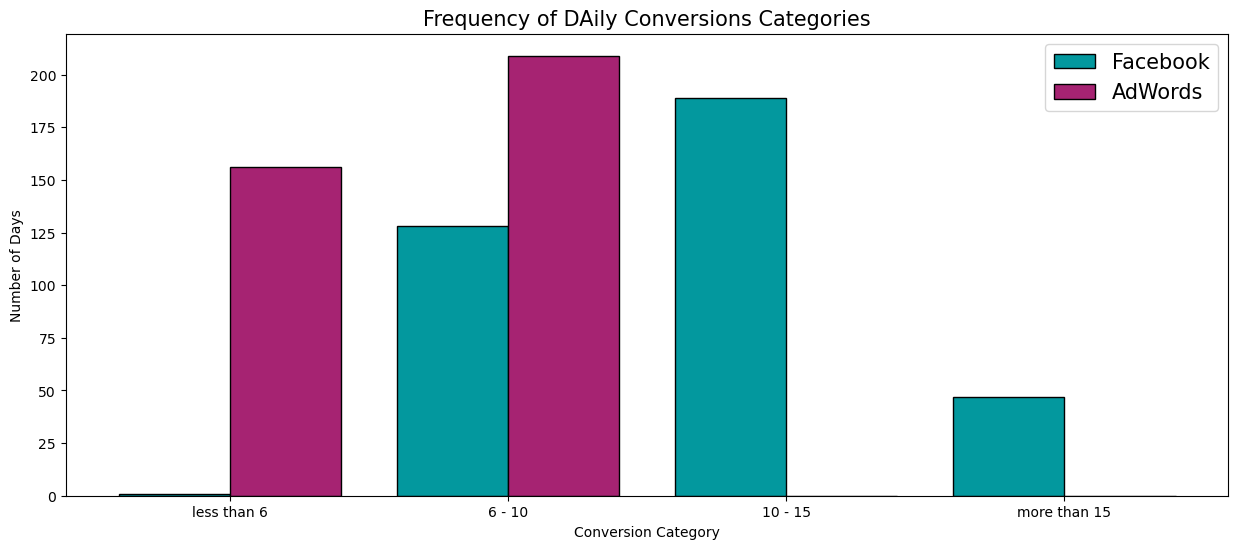

In [21]:
x_axis = np.arange(len(category_df))
plt.figure(figsize = (15,6))
plt.bar(x_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#03989E',linewidth = 1, edgecolor = 'k')
plt.bar(x_axis + 0.2, category_df['count_y'], 0.4, label = 'AdWords', color = '#A62372',linewidth = 1, edgecolor = 'k')

plt.xticks(x_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of Days")
plt.title("Frequency of DAily Conversions Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).There is a significant variance in the number of high-conversion days between two different campaigns.

## Do more clicks on the ad really lead to more sales?

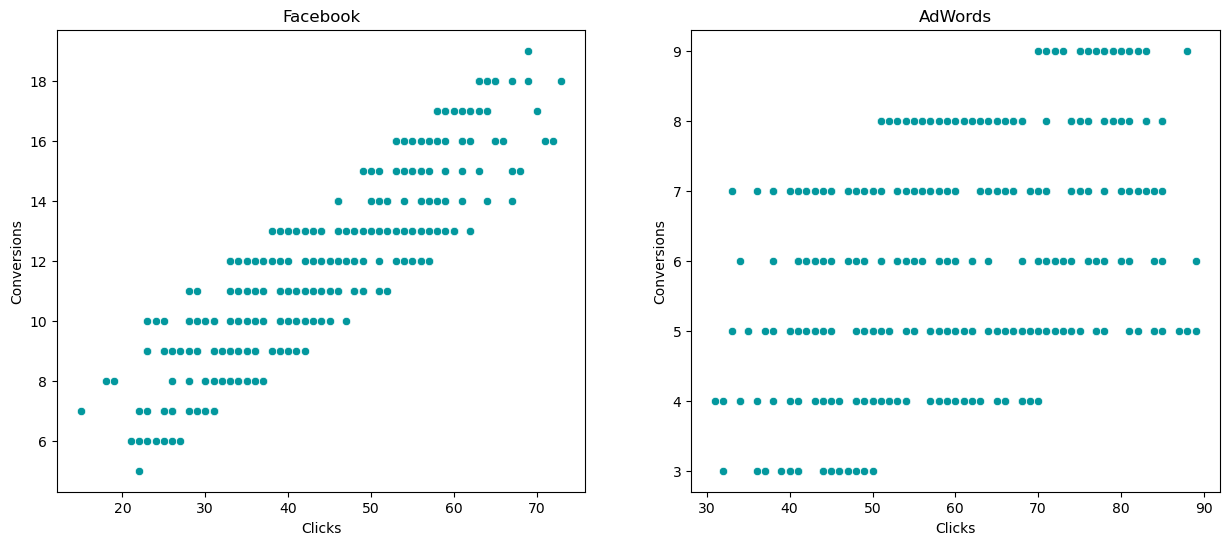

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'], y= df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'], y= df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [27]:
facebook_corr = df[['Facebook Ad Conversions', 'Facebook Ad Clicks']].corr()
facebook_corr

Facebook Ad Conversions  Facebook Ad Clicks
Facebook Ad Conversions                 1.000000            0.873775
Facebook Ad Clicks                      0.873775            1.000000

In [28]:
adwords_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr()
adwords_corr

AdWords Ad Conversions  AdWords Ad Clicks
AdWords Ad Conversions                1.000000           0.447993
AdWords Ad Clicks                     0.447993           1.000000

### A correlation coefficient of 0.87 indicates a positive relation between the clicks on facebook ads and sales. This suggest as the number clicks increases on facebook ads the sale also increases. In AdWords the correlation between clicks on ads and sale in moderate not too high.

## Hypothesis Testing
### Hypothesis: Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

### Null Hypothesis (H0): There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

### H0: µ_Facebook ≤ µ_AdWords

### Alternate Hypothesis (H1): The number of conversions from Facebook is greater than the number of conversions from AdWords.

### H1: µ_Facebook > µ_AdWords


In [29]:
df['Facebook Ad Conversions'].mean()

np.float64(11.742465753424657)

In [30]:
print('Mean Conversion \n...........')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(), 2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(), 2))
t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# Comparing the p value with the significance of 5%
if p_value <0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
...........
Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


##### The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

### Regression Analysis

In [37]:
# independent variable
x = df[['Facebook Ad Clicks']]

# dependent variable
y = df['Facebook Ad Conversions']

# intialization and fitting linear regression model
reg_model = LinearRegression()
reg_model.fit(x, y)
prediction = reg_model.predict(x)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse, 2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


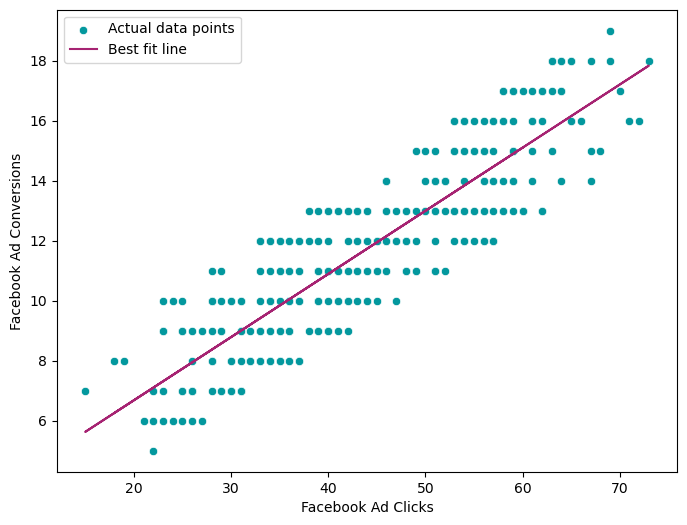

In [38]:
# Plotting linear regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E', label='Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color='#A62372', label='Best fit line')
plt.legend()
plt.show()

In [44]:
print(f'For 50 Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0], 2)}')
print(f'For 80 Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0], 2)}')


For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


## Analyzing Facebook campaign over time 

In [50]:
# Cleaning data 

df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].str.replace('%', '').astype(float)
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].str.replace('%', '').astype(float)
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].str.replace('$', '').astype(float)
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].str.replace('$', '').astype(float)
print(" Data cleaned successfully!")


AttributeError: Can only use .str accessor with string values!

In [51]:
df.head()

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0  1/1/2019             FB_Jan19               2116                  18   
1  1/2/2019             FB_Jan19               3106                  36   
2  1/3/2019             FB_Jan19               3105                  26   
3  1/4/2019             FB_Jan19               1107                  27   
4  1/5/2019             FB_Jan19               1317                  15   

   Facebook Ad Conversions  Cost per Facebook Ad  \
0                        8                 126.0   
1                       12                 104.0   
2                        8                 102.0   
3                        9                  71.0   
4                        7                  78.0   

   Facebook Click-Through Rate (Clicks / View)  \
0                                         0.83   
1                                         1.15   
2                                         0.84   
3                                         2.45   
4                                         1.10   

   Facebook Conversion Rate (Conversions / Clicks)  \
0                                            42.73   
1                                            34.04   
2                                            31.45   
3                                            34.76   
4                                            47.59   

   Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  \
0                                        7.14            AW_Jan19   
1                                        2.91            AW_Jan19   
2                                        3.89            AW_Jan19   
3                                        2.62            AW_Jan19   
4                                        5.38            AW_Jan19   

   AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  \
0              4984                 59                       5   
1              4022                 71                       6   
2              3863                 44                       4   
3              3911                 49                       5   
4              4070                 55                       7   

  Cost per AdWords Ad AdWords Click-Through Rate (Clicks / View)  \
0                $194                                      1.18%   
1                 $75                                      1.77%   
2                $141                                      1.13%   
3                $141                                      1.26%   
4                $133                                      1.36%   

  AdWords Conversion Rate (Conversions / Click)  \
0                                         8.40%   
1                                         7.80%   
2                                         9.59%   
3                                        11.08%   
4                                        12.22%   

  AdWords Cost per Click (Ad Cost / Clicks) Facebook Conversion Category  \
0                                     $3.30                       6 - 10   
1                                     $1.05                      10 - 15   
2                                     $3.23                       6 - 10   
3                                     $2.86                       6 - 10   
4                                     $2.40                       6 - 10   

  AdWords Conversion Category  
0                 less than 6  
1                      6 - 10  
2                 less than 6  
3                 less than 6  
4                      6 - 10

In [58]:
# filtering for facebook
df = df[['Date','Facebook Ad Campaign', 'Facebook Ad Views', 'Facebook Ad Conversions', 'Cost per Facebook Ad', 
         'Facebook Click-Through Rate (Clicks / View)',
         'Facebook Conversion Rate (Conversions / Clicks)',
         'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()


Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Conversions  \
0  1/1/2019             FB_Jan19               2116                        8   
1  1/2/2019             FB_Jan19               3106                       12   
2  1/3/2019             FB_Jan19               3105                        8   
3  1/4/2019             FB_Jan19               1107                        9   
4  1/5/2019             FB_Jan19               1317                        7   

   Cost per Facebook Ad  Facebook Click-Through Rate (Clicks / View)  \
0                 126.0                                         0.83   
1                 104.0                                         1.15   
2                 102.0                                         0.84   
3                  71.0                                         2.45   
4                  78.0                                         1.10   

   Facebook Conversion Rate (Conversions / Clicks)  \
0                                            42.73   
1                                            34.04   
2                                            31.45   
3                                            34.76   
4                                            47.59   

   Facebook Cost per Click (Ad Cost / Clicks)  
0                                        7.14  
1                                        2.91  
2                                        3.89  
3                                        2.62  
4                                        5.38

In [13]:
# Extracting month and week to see the conversion for whole year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')   # convert to datetime
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday


In [9]:
df.head()

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0  1/1/2019             FB_Jan19               2116                  18   
1  1/2/2019             FB_Jan19               3106                  36   
2  1/3/2019             FB_Jan19               3105                  26   
3  1/4/2019             FB_Jan19               1107                  27   
4  1/5/2019             FB_Jan19               1317                  15   

   Facebook Ad Conversions Cost per Facebook Ad  \
0                        8                 $126   
1                       12                 $104   
2                        8                 $102   
3                        9                  $71   
4                        7                  $78   

  Facebook Click-Through Rate (Clicks / View)  \
0                                       0.83%   
1                                       1.15%   
2                                       0.84%   
3                                       2.45%   
4                                       1.10%   

  Facebook Conversion Rate (Conversions / Clicks)  \
0                                          42.73%   
1                                          34.04%   
2                                          31.45%   
3                                          34.76%   
4                                          47.59%   

  Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  \
0                                      $7.14            AW_Jan19   
1                                      $2.91            AW_Jan19   
2                                      $3.89            AW_Jan19   
3                                      $2.62            AW_Jan19   
4                                      $5.38            AW_Jan19   

   AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  \
0              4984                 59                       5   
1              4022                 71                       6   
2              3863                 44                       4   
3              3911                 49                       5   
4              4070                 55                       7   

  Cost per AdWords Ad AdWords Click-Through Rate (Clicks / View)  \
0                $194                                      1.18%   
1                 $75                                      1.77%   
2                $141                                      1.13%   
3                $141                                      1.26%   
4                $133                                      1.36%   

  AdWords Conversion Rate (Conversions / Click)  \
0                                         8.40%   
1                                         7.80%   
2                                         9.59%   
3                                        11.08%   
4                                        12.22%   

  AdWords Cost per Click (Ad Cost / Clicks)  
0                                     $3.30  
1                                     $1.05  
2                                     $3.23  
3                                     $2.86  
4                                     $2.40

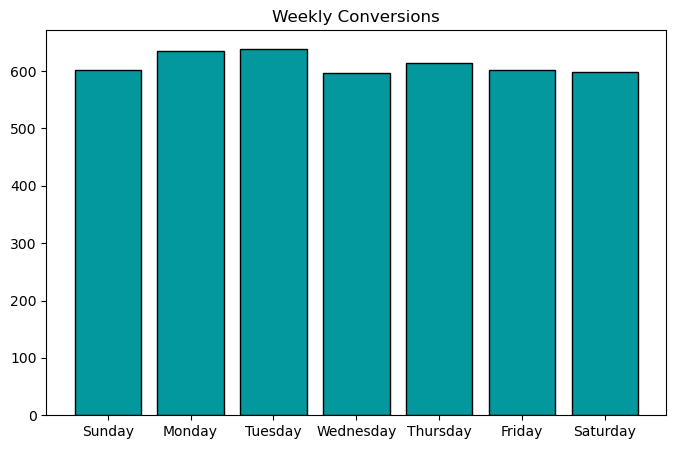

In [14]:
plt.figure(figsize = (8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

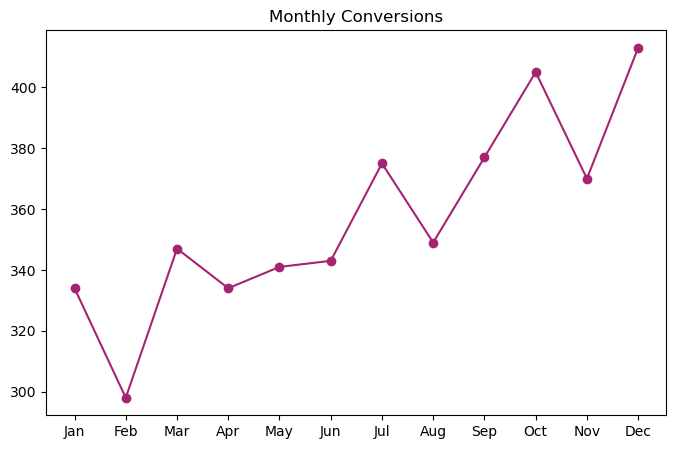

In [15]:
plt.figure(figsize = (8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'], '-o', color = '#A62372')
plt.show()

### How does the Cost Per Conversion (CPC) trend over time?
CPC evaluate the cost effectiveness and profitablity of an online campaign.This help the marketer to optimize the market strategy and their spending over online campaign

In [16]:
monthly = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly

Facebook Ad Conversions  \
month                            
1                          334   
2                          298   
3                          347   
4                          334   
5                          341   
6                          343   
7                          375   
8                          349   
9                          377   
10                         405   
11                         370   
12                         413   

                                    Cost per Facebook Ad  
month                                                     
1      $126$104$102$71$78$113$37$105$96$62$41$123$88$...  
2      $86$94$143$48$107$110$61$86$64$92$129$121$34$5...  
3      $93$92$118$59$40$92$99$142$107$96$43$105$118$6...  
4      $99$59$43$65$126$102$108$58$60$92$70$74$69$114...  
5      $42$64$121$103$62$69$99$82$130$112$53$60$56$79...  
6      $79$107$73$99$84$112$46$107$76$71$144$57$88$82...  
7      $68$62$95$119$41$98$134$131$43$136$103$64$103$...  
8      $119$50$57$79$112$138$66$122$68$52$53$92$91$54...  
9      $107$93$131$136$79$43$59$48$64$43$120$60$130$7...  
10     $60$119$94$82$122$115$113$48$62$53$106$57$122$...  
11     $48$127$83$102$95$73$69$61$83$135$43$38$112$94...  
12     $66$99$99$142$112$52$126$117$121$102$60$56$142...

In [17]:
plt.show()

In [19]:
# Clean all columns in one go
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col] = df[col].replace(r'[%$₹,]', '', regex=True)  # remove symbols
        df[col] = pd.to_numeric(df[col], errors='ignore')     # convert to number if possible


In [20]:
monthly['Cost per Conversion'] = monthly['Cost per Facebook Ad'] / monthly['Facebook Ad Conversions']
monthly

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [21]:
# Clean and convert all object columns in monthly DataFrame
for col in monthly.columns:
    if monthly[col].dtype == 'object':
        # remove common symbols
        monthly[col] = monthly[col].replace(r'[%$₹,]', '', regex=True)
        # force convert to numeric, invalid values become NaN
        monthly[col] = pd.to_numeric(monthly[col], errors='coerce')

# Now safely calculate Cost per Conversion (avoid division by zero)
monthly['Cost per Conversion'] = monthly['Cost per Facebook Ad'] / monthly['Facebook Ad Conversions']

# Replace inf/nan (caused by division by 0 or empty cells)
monthly['Cost per Conversion'] = monthly['Cost per Conversion'].replace([float('inf'), -float('inf')], None)


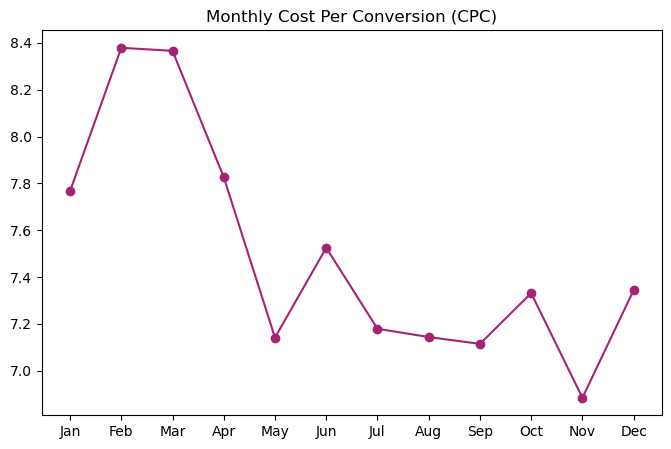

In [23]:
plt.figure(figsize = (8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly['Cost per Conversion'] = monthly['Cost per Facebook Ad']/monthly['Facebook Ad Conversions']
plt.plot(month_names, monthly['Cost per Conversion'], '-o', color = '#A62372')
plt.show()

### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [24]:
score, p_value, crit_value = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Conversion test score :',score)
print('P-Value :',p_value)
print('Critical Value :',crit_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Conversion test score : -14.755428385103222
P-Value : 2.133737597906117e-26
Critical Value : [-3.92678068 -3.35296748 -3.05612218]

p-value is less than significance value, Reject the null hypothesis


##### Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

